In [7]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as mpl
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler, normalize

In [17]:
# Load the dataset

db = pd.read_csv("C://Users/wawes/OneDrive/Desktop/ZETECH UNIVERSITY/Y4S2/MACHINE LEARNING/Topic 2/Salary Dataset.csv")

In [18]:
# Display the dataset summary

db

,Company Name,Job Title,Salaries Reported,Location,Salary
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr"
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr"
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr"
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr"
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr"
...,...,...,...,...,...
4339,TaiyōAI,Machine Learning Scientist,1.0,Mumbai,"₹5,180/mo"
4340,Decimal Point Analytics,Machine Learning Developer,1.0,Mumbai,"₹7,51,286/yr"
4341,MyWays,Machine Learning Developer,1.0,Mumbai,"₹4,10,952/yr"
4342,Market Pulse Technologies,Software Engineer - Machine Learning,1.0,Mumbai,"₹16,12,324/yr"


In [19]:
# Changing Company name and job title into figures in order to plot the information

def label_encoder(db_: pd.DataFrame(), columns_name_: list):
    le = LabelEncoder()
    for i in columns_name_:
        le.fit(db_[i])
        db_[i] = le.transform(db_[i])
    return db_

db = label_encoder(db, ['Company Name', 'Job Title'])
db

,Company Name,Job Title,Salaries Reported,Location,Salary
0,1452,8,105.0,Bangalore,"₹6,48,573/yr"
1,1019,8,95.0,Bangalore,"₹11,91,950/yr"
2,2123,8,66.0,Bangalore,"₹8,36,874/yr"
3,1064,8,40.0,Bangalore,"₹6,69,578/yr"
4,66,8,32.0,Bangalore,"₹9,44,110/yr"
...,...,...,...,...,...
4339,2113,21,1.0,Mumbai,"₹5,180/mo"
4340,610,18,1.0,Mumbai,"₹7,51,286/yr"
4341,1460,18,1.0,Mumbai,"₹4,10,952/yr"
4342,1357,25,1.0,Mumbai,"₹16,12,324/yr"


In [21]:
# Checking the structure of the dataset

db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4344 entries, 0 to 4343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company Name       4344 non-null   int32  
 1   Job Title          4344 non-null   int32  
 2   Salaries Reported  4342 non-null   float64
 3   Location           4344 non-null   object 
 4   Salary             4344 non-null   object 
dtypes: float64(1), int32(2), object(2)
memory usage: 135.9+ KB


In [22]:
# Checking for Null values in the dataset

db.isnull().sum()

Company Name         0
Job Title            0
Salaries Reported    2
Location             0
Salary               0
dtype: int64

In [23]:
# Replacing Null values with zeros

db.fillna(0, inplace=True)

In [24]:
# Confirming that Null values have been replaced

db.isnull().sum()

Company Name         0
Job Title            0
Salaries Reported    0
Location             0
Salary               0
dtype: int64

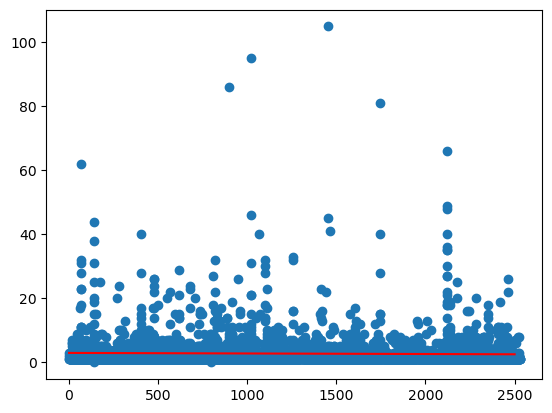

In [32]:
# Define the independent and dependent variables, Create a linear regression object, Fit the model using the training data
# Make predictions on new data, Plot the results
# The red line represents the regression line predicting future values for reported salaries for the different companies

X = db['Company Name'].values.reshape(-1, 1)
y = db['Salaries Reported'].values.reshape(-1, 1)
regressor = LinearRegression()
regressor.fit(X, y)
new_data = np.array([1, 2, 3, 4, 5, 2500]).reshape(-1, 1)
predictions = regressor.predict(new_data)
mpl.scatter(X, y)
mpl.plot(new_data, predictions, color='red')
mpl.show()

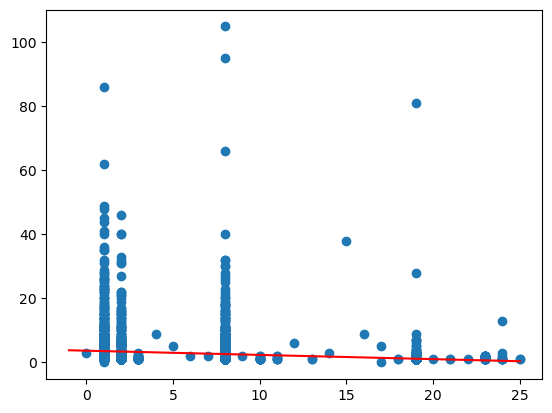

In [31]:
# The regression line predicts future reported salaries for the different job title available

X = db['Job Title'].values.reshape(-1, 1)
y = db['Salaries Reported'].values.reshape(-1, 1)
regressor = LinearRegression()
regressor.fit(X, y)
new_data = np.array([-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 25]).reshape(-1, 1)
predictions = regressor.predict(new_data)
mpl.scatter(X, y)
mpl.plot(new_data, predictions, color='red')
mpl.show()